In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install openpyxl

In [ ]:


from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
data= pd.read_excel("/content/drive/MyDrive/ML/ML/Compressive strength/Dataset 2.xlsx")
data.head()

,Cement,Lime,Flyash,GGBS,Silica,RHA,coarse,Fineagg,Water,SP,VMA,CS
0,225.0,0.0,225.0,0.0,0.0,0,865.0,898.0,179.0,4.50,0.315,33.94
1,231.0,0.0,231.0,0.0,0.0,0,862.0,864.0,175.0,4.62,0.370,38.90
2,258.0,0.0,258.0,0.0,0.0,0,835.0,836.0,176.0,5.16,0.413,41.21
3,330.0,0.0,220.0,0.0,0.0,0,826.0,827.0,176.0,5.50,0.440,45.95
4,360.0,0.0,240.0,0.0,0.0,0,797.0,796.0,180.0,6.00,0.480,53.00


In [ ]:
data.columns

Index(['Cement', 'Lime', 'Flyash', 'GGBS', 'Silica', 'RHA', 'coarse',
       'Fineagg', 'Water', 'SP', 'VMA', 'CS'],
      dtype='object')

In [ ]:
data.describe()

,Cement,Lime,Flyash,GGBS,Silica,RHA,coarse,Fineagg,Water,SP,VMA,CS
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,344.859730,32.308108,110.009324,14.037838,15.567568,4.628378,738.202365,869.886419,175.823784,6.730581,0.176676,55.180014
std,96.571098,68.223761,96.659551,49.606127,36.547083,19.167106,106.196552,116.988902,26.595341,4.277921,0.337418,19.086498
min,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,500.000000,478.000000,94.500000,0.000000,0.000000,10.200000
25%,270.000000,0.000000,0.000000,0.000000,0.000000,0.000000,636.750000,809.500000,158.000000,3.700000,0.000000,42.650000
50%,331.330000,0.000000,125.000000,0.000000,0.000000,0.000000,757.090000,863.000000,180.050000,6.050000,0.000000,55.250000
75%,400.000000,0.000000,180.560000,0.000000,0.000000,0.000000,837.000000,910.500000,198.000000,8.825000,0.000000,68.200000
max,570.000000,272.000000,350.000000,330.000000,250.000000,150.000000,881.000000,1135.000000,250.000000,22.500000,1.030000,117.030000


# Data Preprocessing

In [ ]:


data.isnull().sum()

,0
Cement,0
Lime,0
Flyash,0
GGBS,0
Silica,0
RHA,0
coarse,0
Fineagg,0
Water,0
SP,0


In [ ]:
# split into train and test
from sklearn.model_selection import train_test_split

X=data.iloc[:,:-1] # all columns but last
y=data.iloc[:,-1]

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=2)

# rescale the features to have a mean of zero and standard deviation of 1.
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()

X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

# Model Building

<h3>Linear Regrission</h3>

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Linear Regression
lr = LinearRegression()
# Lasso Regression
lasso = Lasso()
# Ridge Regression
ridge = Ridge()

# Fitting models on Training data
lr.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)



In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Model\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""LinearRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lr)),mean_squared_error(y_test, y_pred_lr),
            mean_absolute_error(y_test, y_pred_lr), r2_score(y_test, y_pred_lr)))
print("""LassoRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lasso)),mean_squared_error(y_test, y_pred_lasso),
            mean_absolute_error(y_test, y_pred_lasso), r2_score(y_test, y_pred_lasso)))
print("""RidgeRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_ridge)),mean_squared_error(y_test, y_pred_ridge),
            mean_absolute_error(y_test, y_pred_ridge), r2_score(y_test, y_pred_ridge)))

Model			 RMSE 		 MSE 		 MAE 		 R2
LinearRegression 	 12.98 		 168.44 	10.18 		0.31
LassoRegression 	 12.81 		 164.03 	10.63 		0.33
RidgeRegression 	 12.80 		 163.92 	10.04 		0.33


<ipython-input-15-2edaa9bd6e43>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color=line_color)
<ipython-input-15-2edaa9bd6e43>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color=line_color)
<ipython-input-15-2edaa9bd6e43>:27: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color=line_color)


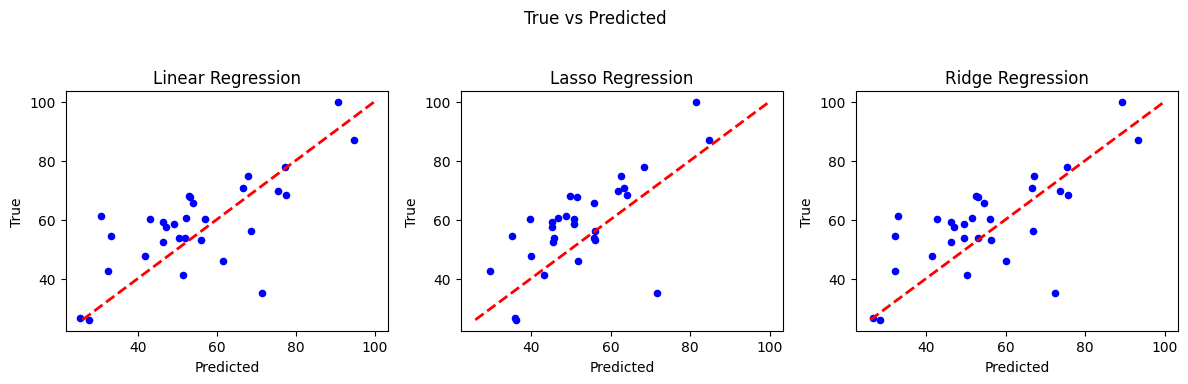

In [ ]:
# Importing necessary libraries
import matplotlib.pyplot as plt

# Set the colors for the scatter plots
scatter_color = 'blue'
line_color = 'red'

# Plotting predictions
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

# Linear Regression
ax1.scatter(y_pred_lr, y_test, s=20, c=scatter_color)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color=line_color)
ax1.set_ylabel("True")
ax1.set_xlabel("Predicted")
ax1.set_title("Linear Regression")

# Lasso Regression
ax2.scatter(y_pred_lasso, y_test, s=20, c=scatter_color)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color=line_color)
ax2.set_ylabel("True")
ax2.set_xlabel("Predicted")
ax2.set_title("Lasso Regression")

# Ridge Regression
ax3.scatter(y_pred_ridge, y_test, s=20, c=scatter_color)
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color=line_color)
ax3.set_ylabel("True")
ax3.set_xlabel("Predicted")
ax3.set_title("Ridge Regression")

# Set the title for the entire plot
fig.suptitle("True vs Predicted")

# Adjust layout for better visualization
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()


In [ ]:
# Coefficients and intercept for Linear Regression
m_lr = lr.coef_
c_lr = lr.intercept_

# Coefficients and intercept for Lasso Regression
m_lasso = lasso.coef_
c_lasso = lasso.intercept_

# Coefficients and intercept for Ridge Regression
m_ridge = ridge.coef_
c_ridge = ridge.intercept_

# Print the coefficients and intercepts
print("Linear Regression: y = {:.2f}x + {:.2f}".format(m_lr[0], c_lr))
print("Lasso Regression: y = {:.1f}x + {:.2f}".format(m_lasso[0], c_lasso))
print("Ridge Regression: y = {:.2f}x + {:.2f}".format(m_ridge[0], c_ridge))


Linear Regression: y = 24.63x + 54.34
Lasso Regression: y = 12.5x + 54.34
Ridge Regression: y = 22.77x + 54.34


<ipython-input-17-f7adf3a40d98>:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
<ipython-input-17-f7adf3a40d98>:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='blue')
<ipython-input-17-f7adf3a40d98>:26: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='purple')


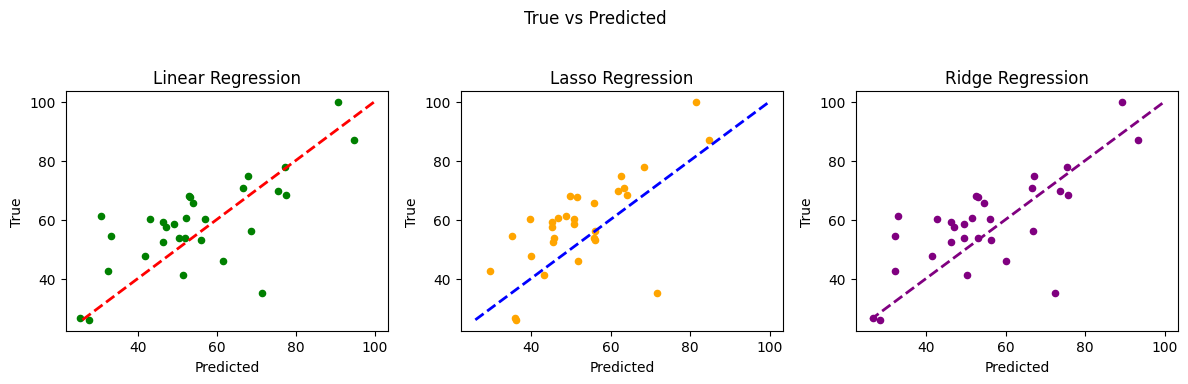

In [ ]:
# Importing necessary libraries
import matplotlib.pyplot as plt

# Set different colors for scatter points
scatter_colors = ['green', 'orange', 'purple']

# Plotting predictions
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

# Linear Regression
ax1.scatter(y_pred_lr, y_test, s=20, c=scatter_colors[0])
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
ax1.set_ylabel("True")
ax1.set_xlabel("Predicted")
ax1.set_title("Linear Regression")

# Lasso Regression
ax2.scatter(y_pred_lasso, y_test, s=20, c=scatter_colors[1])
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='blue')
ax2.set_ylabel("True")
ax2.set_xlabel("Predicted")
ax2.set_title("Lasso Regression")

# Ridge Regression
ax3.scatter(y_pred_ridge, y_test, s=20, c=scatter_colors[2])
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='purple')
ax3.set_ylabel("True")
ax3.set_xlabel("Predicted")
ax3.set_title("Ridge Regression")

# Set the title for the entire plot
fig.suptitle("True vs Predicted")

# Adjust layout for better visualization
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()


<ipython-input-18-d4176398538e>:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
<ipython-input-18-d4176398538e>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='blue')
<ipython-input-18-d4176398538e>:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='purple')


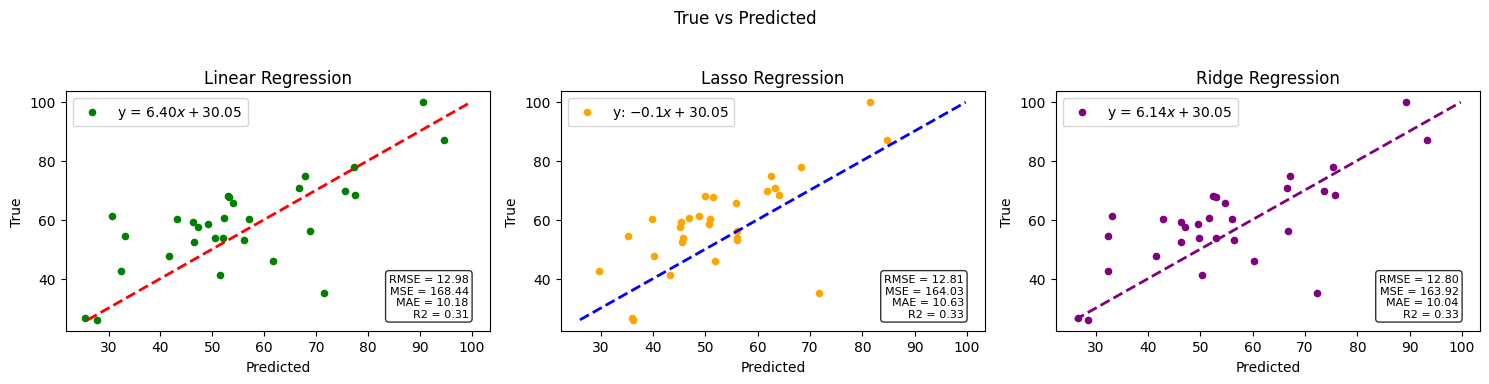

In [ ]:
# Importing necessary libraries
import matplotlib.pyplot as plt

# Set different colors for scatter points
scatter_colors = ['green', 'orange', 'purple']

# Plotting predictions
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))

# Linear Regression
ax1.scatter(y_pred_lr, y_test, s=20, c=scatter_colors[0], label='y = $6.40x + 30.05$')
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
ax1.set_ylabel("True")
ax1.set_xlabel("Predicted")
ax1.set_title("Linear Regression")
ax1.legend()

# Lasso Regression
ax2.scatter(y_pred_lasso, y_test, s=20, c=scatter_colors[1], label='y: $-0.1x + 30.05$')
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='blue')
ax2.set_ylabel("True")
ax2.set_xlabel("Predicted")
ax2.set_title("Lasso Regression")
ax2.legend()

# Ridge Regression
ax3.scatter(y_pred_ridge, y_test, s=20, c=scatter_colors[2], label='y = $6.14x + 30.05$')
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='purple')
ax3.set_ylabel("True")
ax3.set_xlabel("Predicted")
ax3.set_title("Ridge Regression")
ax3.legend()

# Add text boxes with model information
text_box_props = dict(boxstyle='round', facecolor='white', alpha=0.8)

ax1.text(0.95, 0.05, f"RMSE = {np.sqrt(mean_squared_error(y_test, y_pred_lr)):.2f}\nMSE = {mean_squared_error(y_test, y_pred_lr):.2f}\nMAE = {mean_absolute_error(y_test, y_pred_lr):.2f}\nR2 = {r2_score(y_test, y_pred_lr):.2f}",
         transform=ax1.transAxes, fontsize=8, verticalalignment='bottom', horizontalalignment='right', bbox=text_box_props)

ax2.text(0.95, 0.05, f"RMSE = {np.sqrt(mean_squared_error(y_test, y_pred_lasso)):.2f}\nMSE = {mean_squared_error(y_test, y_pred_lasso):.2f}\nMAE = {mean_absolute_error(y_test, y_pred_lasso):.2f}\nR2 = {r2_score(y_test, y_pred_lasso):.2f}",
         transform=ax2.transAxes, fontsize=8, verticalalignment='bottom', horizontalalignment='right', bbox=text_box_props)

ax3.text(0.95, 0.05, f"RMSE = {np.sqrt(mean_squared_error(y_test, y_pred_ridge)):.2f}\nMSE = {mean_squared_error(y_test, y_pred_ridge):.2f}\nMAE = {mean_absolute_error(y_test, y_pred_ridge):.2f}\nR2 = {r2_score(y_test, y_pred_ridge):.2f}",
         transform=ax3.transAxes, fontsize=8, verticalalignment='bottom', horizontalalignment='right', bbox=text_box_props)

# Set the title for the entire plot
fig.suptitle("True vs Predicted")

# Adjust layout for better visualization
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()


# XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
data_dmatrix= xgb.DMatrix(data=X, label=y)

In [ ]:
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=4)
rr1 = model.fit(X_train,y_train)
rr1.score(X_test, y_test)

0.760179469501069

In [ ]:
y_pred_rr1= rr1.predict(X_test)

Model				 RMSE 		 MSE 		 MAE 		 R2
XGBoost Regressor 	 7.67 		 58.75 		6.31 		0.76


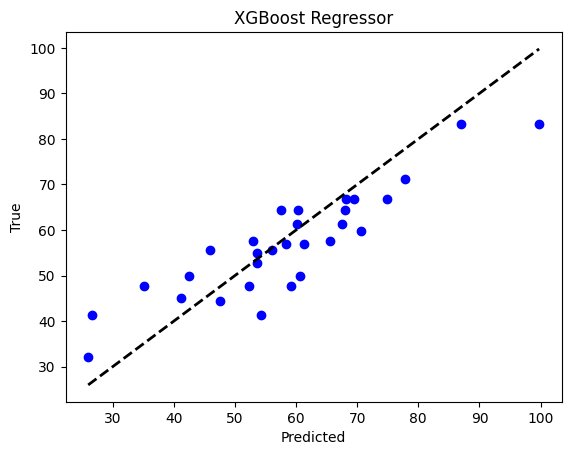

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""XGBoost Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_rr1)),mean_squared_error(y_test, y_pred_rr1),
            mean_absolute_error(y_test, y_pred_rr1), r2_score(y_test, y_pred_rr1)))

plt.scatter(y_test, y_pred_rr1,c = 'blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("XGBoost Regressor")
plt.show()

Model				 RMSE 		 MSE 		 MAE 		 R2
XGBoost Regressor 	 7.67 		 58.75 		6.31 		0.76


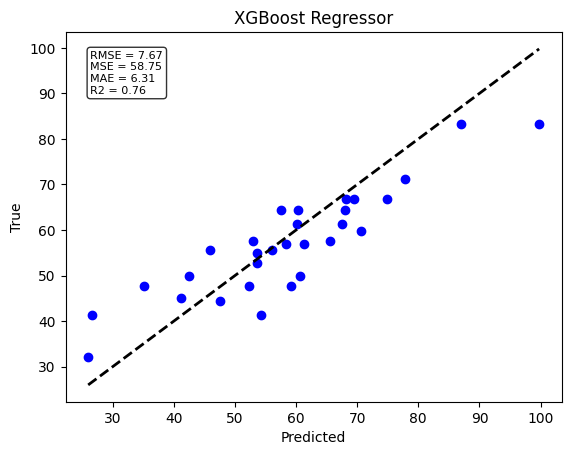

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from xgboost import XGBRegressor

# Create and fit the XGBoost model
model = XGBRegressor(n_estimators=4)
rr1 = model.fit(X_train, y_train)
y_pred_rr1 = rr1.predict(X_test)

# Print error information
print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""XGBoost Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_rr1)), mean_squared_error(y_test, y_pred_rr1),
            mean_absolute_error(y_test, y_pred_rr1), r2_score(y_test, y_pred_rr1)))

# Plotting predictions
plt.scatter(y_test, y_pred_rr1,c='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("XGBoost Regressor")

# Add error information as text
error_text = f"RMSE = {np.sqrt(mean_squared_error(y_test, y_pred_rr1)):.2f}\nMSE = {mean_squared_error(y_test, y_pred_rr1):.2f}\nMAE = {mean_absolute_error(y_test, y_pred_rr1):.2f}\nR2 = {r2_score(y_test, y_pred_rr1):.2f}"
plt.text(0.05, 0.95, error_text, transform=plt.gca().transAxes, fontsize=8, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Show the plot
plt.show()


Model				 RMSE 		 MSE 		 MAE 		 R2
XGBoost Regressor 	 7.67 		 58.75 		6.31 		0.76


<ipython-input-25-3913bd39eaa1>:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
<ipython-input-25-3913bd39eaa1>:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
<ipython-input-25-3913bd39eaa1>:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
<ipython-input-25-3913bd39eaa1>:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "

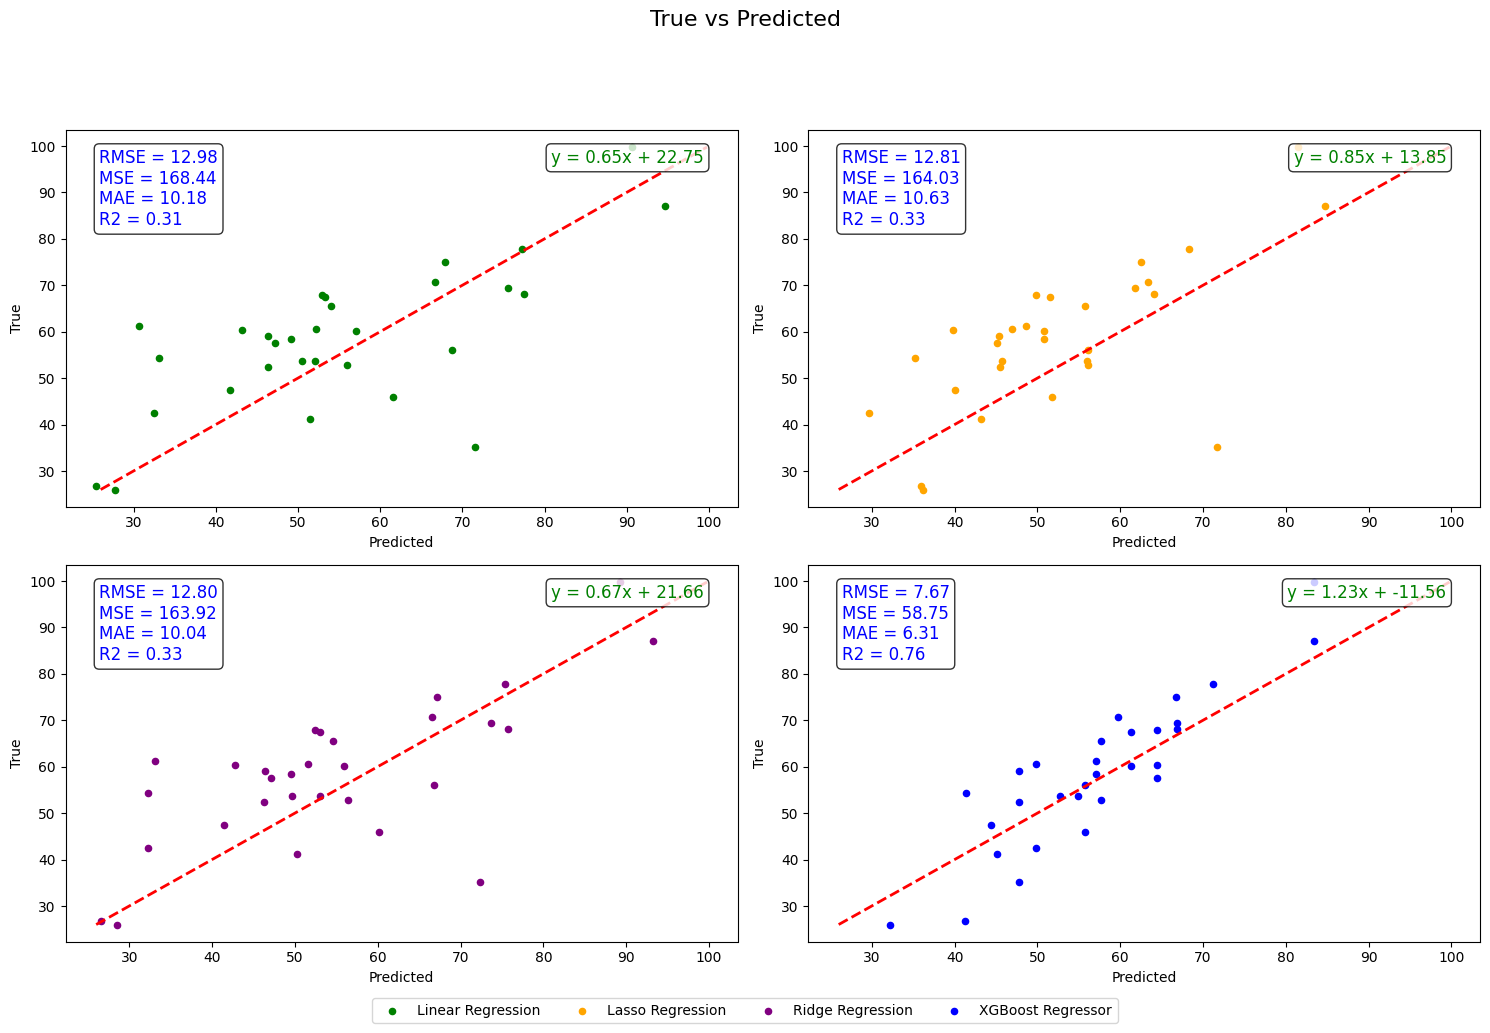

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor

# Create and fit the XGBoost model
model = XGBRegressor(n_estimators=4)
rr1 = model.fit(X_train, y_train)
y_pred_rr1 = rr1.predict(X_test)

# Print error information
print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""XGBoost Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_rr1)), mean_squared_error(y_test, y_pred_rr1),
            mean_absolute_error(y_test, y_pred_rr1), r2_score(y_test, y_pred_rr1)))

# Plotting predictions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Function to plot scatter with equation
def scatter_with_equation(ax, y_pred, y_test, color, label):
    scatter = ax.scatter(y_pred, y_test, s=20, c=color, label=label)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
    ax.set_ylabel("True")
    ax.set_xlabel("Predicted")

    # Add text box with model information
    text_box_props = dict(boxstyle='round', facecolor='white', alpha=0.8, edgecolor='black')
    ax.text(0.05, 0.95, f"RMSE = {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}\n"
                       f"MSE = {mean_squared_error(y_test, y_pred):.2f}\n"
                       f"MAE = {mean_absolute_error(y_test, y_pred):.2f}\n"
                       f"R2 = {r2_score(y_test, y_pred):.2f}",
            transform=ax.transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left', bbox=text_box_props, color='blue')

    # Add equation y = mx + c
    m, c = np.polyfit(y_pred, y_test, 1)
    equation = f'y = {m:.2f}x + {c:.2f}'
    ax.text(0.95, 0.95, equation, transform=ax.transAxes, fontsize=12, verticalalignment='top', horizontalalignment='right', bbox=text_box_props, color='green')

    return scatter

# Scatter plot 1
scatter1 = scatter_with_equation(axes[0, 0], y_pred_lr, y_test, 'green', 'Linear Regression')

# Scatter plot 2
scatter2 = scatter_with_equation(axes[0, 1], y_pred_lasso, y_test, 'orange', 'Lasso Regression')

# Scatter plot 3
scatter3 = scatter_with_equation(axes[1, 0], y_pred_ridge, y_test, 'purple', 'Ridge Regression')

# Scatter plot 4
scatter4 = scatter_with_equation(axes[1, 1], y_pred_rr1, y_test, 'blue', 'XGBoost Regressor')

# Create a common legend at the middle bottom of the plot
fig.legend([scatter1, scatter2, scatter3, scatter4], ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'XGBoost Regressor'], loc='lower center', bbox_to_anchor=(0.5, 0), ncol=4)

# Set the title for the entire plot
fig.suptitle("True vs Predicted", fontsize=16, y=1.02, ha='center')

# Adjust layout for better visualization
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()


Model				 RMSE 		 MSE 		 MAE 		 R2
XGBoost Regressor 	 7.67 		 58.75 		6.31 		0.76


<ipython-input-26-21781504a3cf>:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
<ipython-input-26-21781504a3cf>:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
<ipython-input-26-21781504a3cf>:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
<ipython-input-26-21781504a3cf>:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "

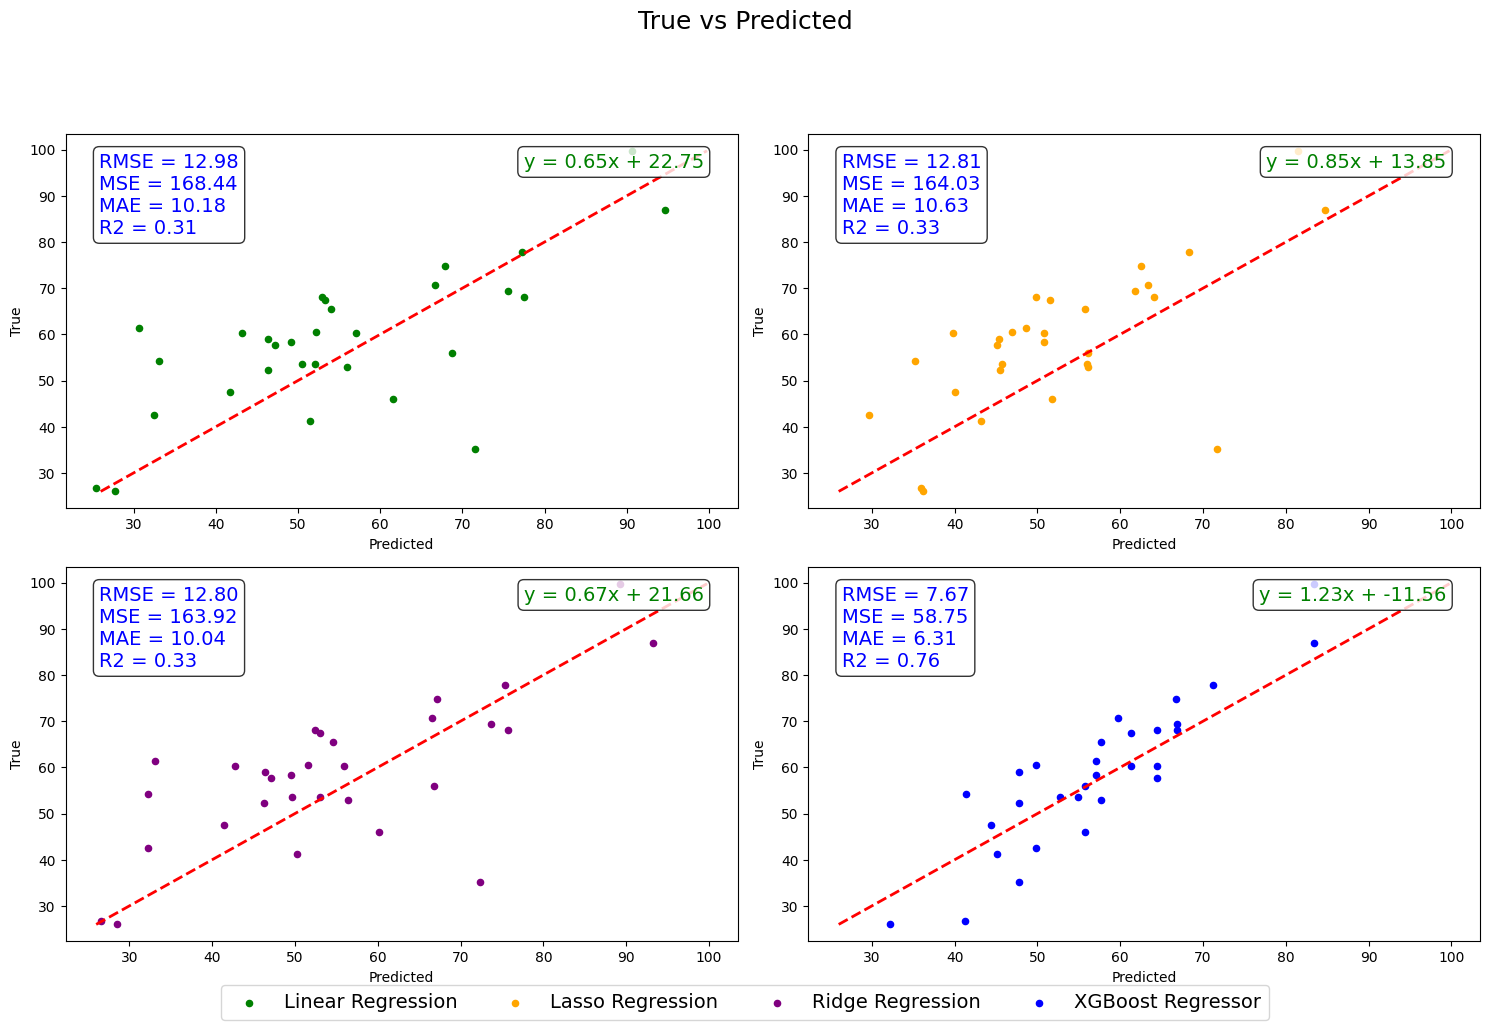

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor

# Create and fit the XGBoost model
model = XGBRegressor(n_estimators=4)
rr1 = model.fit(X_train, y_train)
y_pred_rr1 = rr1.predict(X_test)

# Print error information
print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""XGBoost Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_rr1)), mean_squared_error(y_test, y_pred_rr1),
            mean_absolute_error(y_test, y_pred_rr1), r2_score(y_test, y_pred_rr1)))

# Plotting predictions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Function to plot scatter with equation
def scatter_with_equation(ax, y_pred, y_test, color, label):
    scatter = ax.scatter(y_pred, y_test, s=20, c=color, label=label)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
    ax.set_ylabel("True")
    ax.set_xlabel("Predicted")

    # Add text box with model information
    text_box_props = dict(boxstyle='round', facecolor='white', alpha=0.8, edgecolor='black')
    ax.text(0.05, 0.95, f"RMSE = {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}\n"
                       f"MSE = {mean_squared_error(y_test, y_pred):.2f}\n"
                       f"MAE = {mean_absolute_error(y_test, y_pred):.2f}\n"
                       f"R2 = {r2_score(y_test, y_pred):.2f}",
            transform=ax.transAxes, fontsize=14, verticalalignment='top', horizontalalignment='left', bbox=text_box_props, color='blue')

    # Add equation y = mx + c
    m, c = np.polyfit(y_pred, y_test, 1)
    equation = f'y = {m:.2f}x + {c:.2f}'
    ax.text(0.95, 0.95, equation, transform=ax.transAxes, fontsize=14, verticalalignment='top', horizontalalignment='right', bbox=text_box_props, color='green')

    return scatter

# Scatter plot 1
scatter1 = scatter_with_equation(axes[0, 0], y_pred_lr, y_test, 'green', 'Linear Regression')

# Scatter plot 2
scatter2 = scatter_with_equation(axes[0, 1], y_pred_lasso, y_test, 'orange', 'Lasso Regression')

# Scatter plot 3
scatter3 = scatter_with_equation(axes[1, 0], y_pred_ridge, y_test, 'purple', 'Ridge Regression')

# Scatter plot 4
scatter4 = scatter_with_equation(axes[1, 1], y_pred_rr1, y_test, 'blue', 'XGBoost Regressor')

# Create a common legend at the middle bottom of the plot
fig.legend([scatter1, scatter2, scatter3, scatter4], ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'XGBoost Regressor'], loc='lower center', bbox_to_anchor=(0.5, 0), ncol=4, fontsize=14)

# Set the title for the entire plot
fig.suptitle("True vs Predicted", fontsize=18, y=1.02, ha='center')

# Adjust layout for better visualization
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()


###Feature Importance

In [ ]:
# split into train and test
from sklearn.model_selection import train_test_split

X=data.iloc[:,:-1] # all columns but last
y=data.iloc[:,-1]

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=2)

# Store column names before scaling
feature_names = X_train.columns

# rescale the features to have a mean of zero and standard deviation of 1.
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()

X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

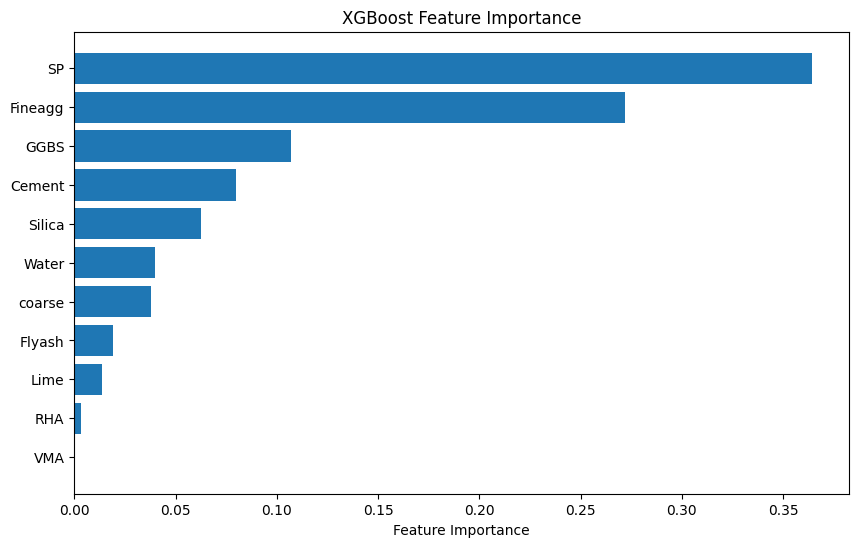

In [ ]:
# Plot feature importance
plt.figure(figsize=(10, 6))
feature_importances = model.feature_importances_
sorted_idx = np.argsort(feature_importances)

plt.barh(range(len(feature_importances)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(feature_importances)), feature_names[sorted_idx])  # Use feature_names here
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importance")
plt.show()

Saving Model and Testing

In [ ]:
from joblib import dump
import os

# Specify the folder where you want to save the model
save_folder = "/content/drive/MyDrive/ML/ML/Compressive strength"
os.makedirs(save_folder, exist_ok=True)  # Create the folder if it doesn't exist

# Full path to save the model
model_path = os.path.join(save_folder, "xgboost_model.joblib")

# Save the trained model
dump(model, model_path)
print(f"Model saved at '{model_path}'")


Model saved at '/content/drive/MyDrive/ML/ML/Compressive strength/xgboost_model.joblib'
